In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
160994,113769.0,-1.210433,0.507319,1.328615,-3.404619,0.626261,-1.339666,1.524181,-0.744937,1.421291,...,-0.121756,0.169537,-0.498999,0.020634,0.979029,-0.364106,-0.464313,-0.353622,10.15,0
160995,113769.0,-0.379340,0.803121,0.535435,3.966398,2.369844,2.389413,0.262759,0.365046,-2.153959,...,0.377139,1.357630,-0.254398,-0.794971,-0.840640,0.542293,0.040570,-0.073145,23.11,0
160996,113770.0,2.073638,-0.131171,-1.148367,0.391800,-0.169697,-1.156148,0.105453,-0.262613,0.718925,...,-0.312210,-0.816203,0.336029,-0.140647,-0.315721,0.208880,-0.077973,-0.063962,0.89,0
160997,113772.0,1.890485,0.261331,-0.160093,4.066246,-0.122212,0.146896,-0.239392,0.069196,-0.098295,...,0.071997,0.455722,0.094141,0.026726,0.069946,0.135425,-0.008944,-0.049222,0.00,0
160998,113774.0,1.902049,0.082306,-0.266203,3.629779,0.143961,1.062073,-0.681857,0.359931,0.028118,...,0.143828,0.399903,0.125676,-0.043506,-0.146835,0.091395,-0.003723,-0.036215,14.48,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Fraudulant cases: 356
Genuine cases: 160643
Proportion of fraudulant cases:0.0022111938583469462


<AxesSubplot:ylabel=' '>

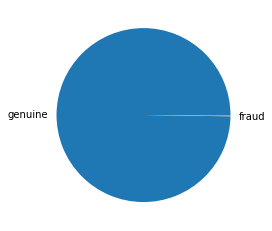

In [6]:
print("Fraudulant cases: " +str(len(df[df["Class"] == 1])))
print("Genuine cases: " +str(len(df[df["Class"] == 0])))
print("Proportion of fraudulant cases:" +str(len(df[df["Class"]==1])/df.shape[0]))

# plotting pie chart
data_pi=df.copy()
data_pi[" "]=np.where(data_pi["Class"]==1, "fraud","genuine")
%matplotlib inline
data_pi[" "].value_counts().plot(kind='pie')

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,...,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000,160999.000000
mean,57626.681079,-0.204576,0.051813,0.561652,0.136731,-0.206457,0.065304,-0.094336,0.041521,0.021649,...,-0.035318,-0.098685,-0.025969,0.010578,0.105927,0.014331,0.001954,0.002505,87.211362,0.002211
std,24782.327208,1.845342,1.614793,1.357716,1.360813,1.333960,1.291631,1.209951,1.238205,1.160348,...,0.745525,0.656064,0.585346,0.596874,0.455695,0.492888,0.392686,0.309928,244.898749,0.046971
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40154.000000,-1.004342,-0.527612,0.034135,-0.718869,-0.849793,-0.681455,-0.591595,-0.153668,-0.662052,...,-0.231594,-0.549239,-0.171179,-0.328621,-0.174546,-0.331008,-0.064210,-0.017021,5.380000,0.000000
50%,58513.000000,-0.228376,0.119839,0.673162,0.145321,-0.251056,-0.194671,-0.041127,0.063819,-0.082951,...,-0.058599,-0.078108,-0.039712,0.062201,0.149057,-0.060832,0.009744,0.022056,21.420000,0.000000
75%,75947.000000,1.174105,0.810791,1.324758,0.959564,0.332886,0.452835,0.446226,0.359237,0.651334,...,0.118681,0.339304,0.092475,0.413399,0.406635,0.278439,0.089562,0.078088,76.500000,0.000000
max,113774.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


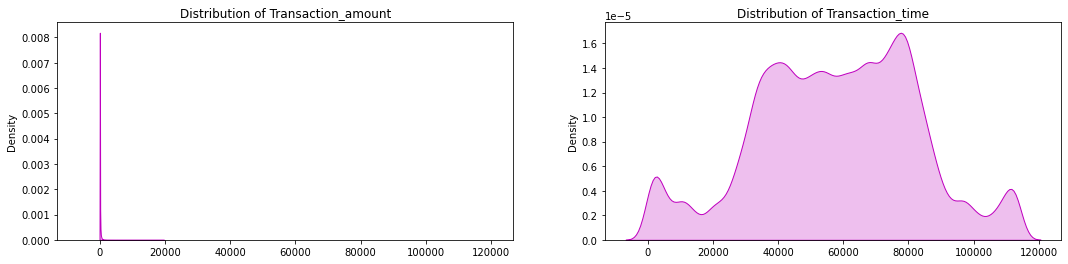

In [8]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex=True)
amount_value= df['Amount'].values
time_value=df['Time'].values
sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title("Distribution of Transaction_amount")
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title("Distribution of Transaction_time")
plt.show()

In [9]:
df['Amount'].value_counts()

1.00       8683
1.98       3157
0.89       2667
9.99       2518
15.00      1748
           ... 
72.89         1
537.30        1
220.40        1
1109.76       1
368.43        1
Name: Amount, Length: 24306, dtype: int64

<AxesSubplot:xlabel='Amount', ylabel='Density'>

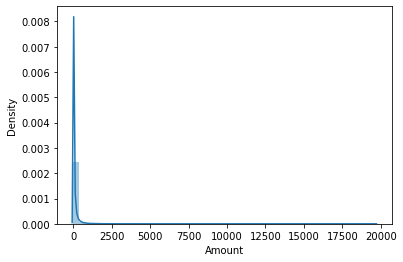

In [10]:
sns.distplot(df["Amount"])

In [11]:
print("Average Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 112.00499999999991
Average Amount in a Valid Transaction: 87.15641683734798


In [12]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(df["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    160999.000000
mean         87.211362
std         244.898749
min           0.000000
25%           5.380000
50%          21.420000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64


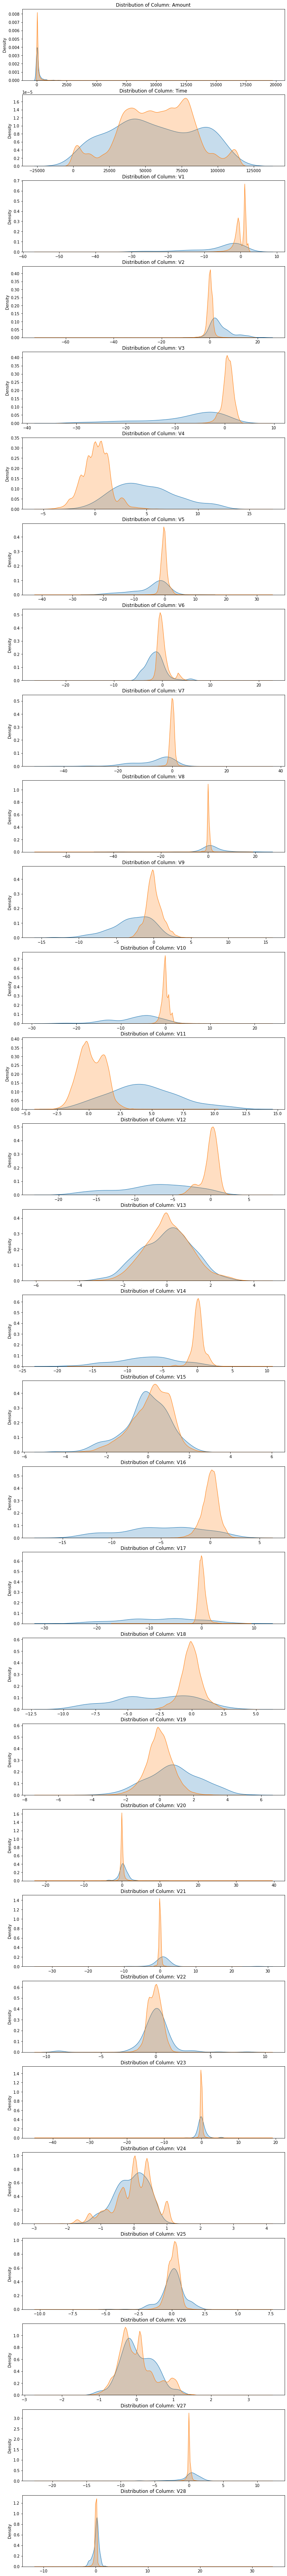

In [13]:
# Reorder the columns Amount, Time then the rest
data_plot = df.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

# Data preparation and missing data

The features are created using PCA and so the feature selection is not necessary as the number of features is small as well.
Now we turn to the treatment of Missing values in the dataframe.

In [20]:
# Number of non null values 
print("Number of non missing values in the data" ,df.isnull().shape[0])

Number of non missing values in the data 160999


In [21]:
#No null values

print("Number of missing values in the data",df.shape[0]-df.isnull().shape[0])

Number of missing values in the data 0


As there is no missing data we head to standardization.We standardize only Time and Amount using RobustScaler.

In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df[['Time','Amount']])
df[['Time','Amount']] = scaler.transform(df[['Time','Amount']])
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.634761,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.802587,0
1,-1.634761,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.263358,0
2,-1.634733,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.023060,0
3,-1.634733,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.435321,0
4,-1.634705,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.682930,0
160994,1.543766,-1.210433,0.507319,1.328615,-3.404619,0.626261,-1.339666,1.524181,-0.744937,1.421291,...,-0.121756,0.169537,-0.498999,0.020634,0.979029,-0.364106,-0.464313,-0.353622,-0.158465,0
160995,1.543766,-0.379340,0.803121,0.535435,3.966398,2.369844,2.389413,0.262759,0.365046,-2.153959,...,0.377139,1.357630,-0.254398,-0.794971,-0.840640,0.542293,0.040570,-0.073145,0.023763,0
160996,1.543793,2.073638,-0.131171,-1.148367,0.391800,-0.169697,-1.156148,0.105453,-0.262613,0.718925,...,-0.312210,-0.816203,0.336029,-0.140647,-0.315721,0.208880,-0.077973,-0.063962,-0.288667,0
160997,1.543849,1.890485,0.261331,-0.160093,4.066246,-0.122212,0.146896,-0.239392,0.069196,-0.098295,...,0.071997,0.455722,0.094141,0.026726,0.069946,0.135425,-0.008944,-0.049222,-0.301181,0
160998,1.543905,1.902049,0.082306,-0.266203,3.629779,0.143961,1.062073,-0.681857,0.359931,0.028118,...,0.143828,0.399903,0.125676,-0.043506,-0.146835,0.091395,-0.003723,-0.036215,-0.097582,0


In [26]:
y=df['Class']
x=df.iloc[:,0:30]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)